In [1]:
import pandas as pd
import numpy as np


# Loading the data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Exploratory Data Analysis (EDA)

In [3]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain,4: asymptomatic",
"resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
" maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
"the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",
"thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain,4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [4]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
df.shape #shape of dataset



pd.set_option("display.float", "{:.2f}".format)
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [9]:

df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

# Data Visulization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


We have 165 person with Heart disease and 138 person without heart disease, so our dataset is balanced


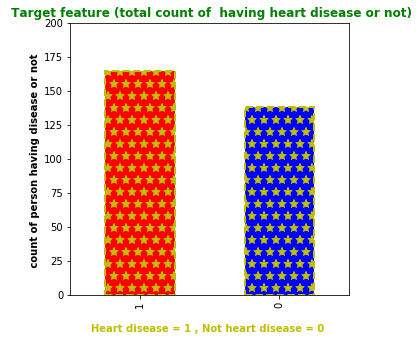

In [11]:
plt.figure(figsize=(5,5))

df.target.value_counts().plot(kind="bar", color=["r", "b"],edgecolor="y",linewidth=2,hatch='*',linestyle='--')
plt.ylim(0,200)
plt.title(" Target feature (total count of  having heart disease or not)",fontweight="bold",color="g")
plt.xlabel(" \nHeart disease = 1 , Not heart disease = 0 ",fontweight="bold",color="y")
plt.ylabel(" count of person having disease or not  ",fontweight="bold")

print("\nWe have 165 person with Heart disease and 138 person without heart disease, so our dataset is balanced")

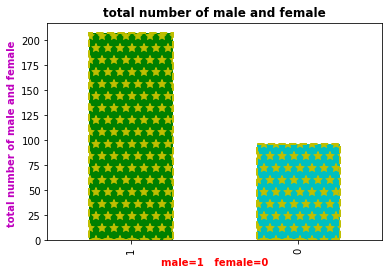

In [12]:
plt.title("total number of male and female",fontweight="bold")
plt.ylabel("total number of male and female ",fontweight="bold",color="m")
plt.xlabel("male=1   female=0",fontweight="bold",color="r")
df["sex"].value_counts().plot(kind="bar",color=["g","c"],edgecolor="y",linewidth=2,hatch='*',linestyle='--');


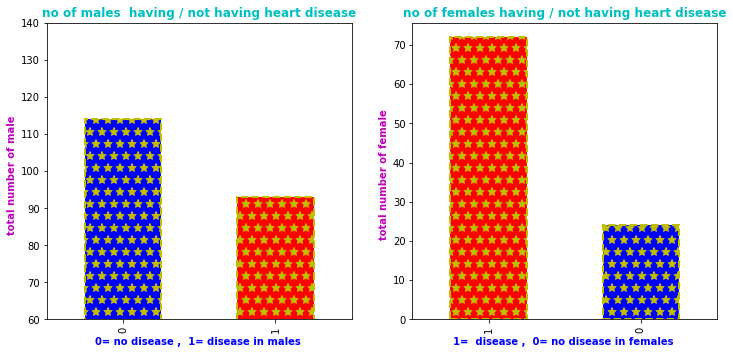

In [13]:

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("no of males  having / not having heart disease",fontweight="bold",color="c")
plt.ylabel("total number of male  ",fontweight="bold",color="m")
plt.xlabel("0= no disease ,  1= disease in males ",fontweight="bold",color="b")
plt.ylim(60,140)
df[df["sex"] == 1]["target"].value_counts().plot(kind="bar",color=["b","r"],edgecolor="y",linewidth=2,hatch='*',linestyle='--')

#plt.legend()
plt.subplot(2,2,2)
plt.title("no of females having / not having heart disease",fontweight="bold",color="c")
plt.ylabel("total number of female  ",fontweight="bold",color="m")
plt.xlabel("1=  disease ,  0= no disease in females ",fontweight="bold",color="b")

df[df["sex"] == 0]["target"].value_counts().plot(kind="bar",color=["r","b"],edgecolor="y",linewidth=2,hatch='*',linestyle='--')
plt.show()
#df[df["sex"] == 1]["target"].value_counts().plot(kind="bar",color="r")

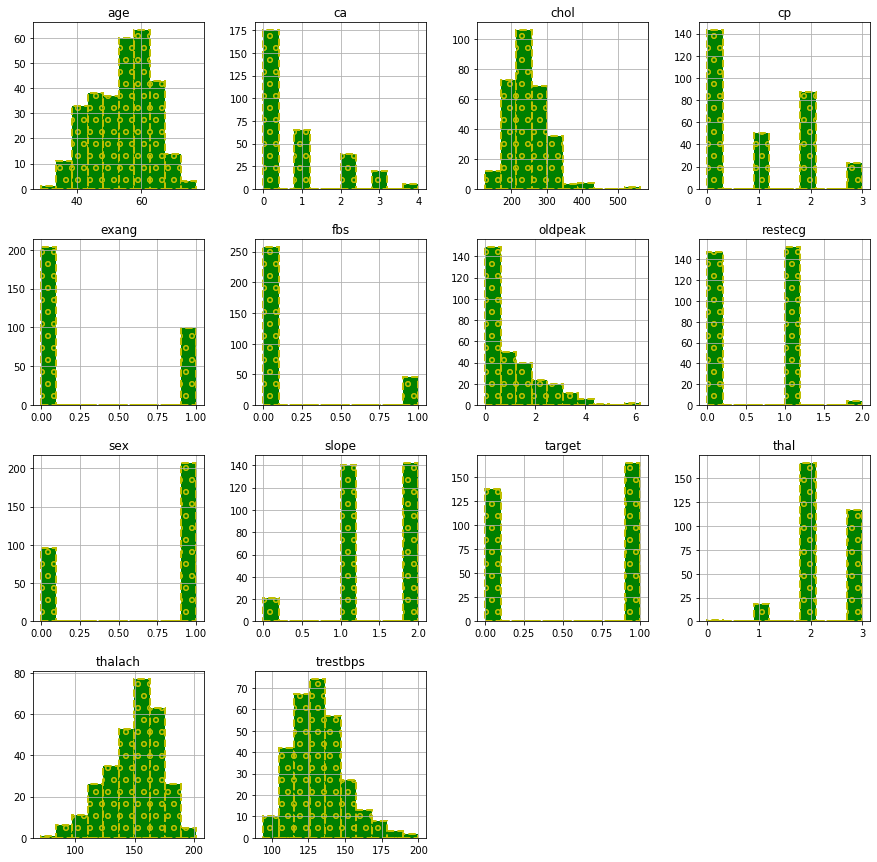

In [14]:
df.hist(figsize=(15,15),color="g",edgecolor="y",linewidth=2,hatch='o',linestyle='--');



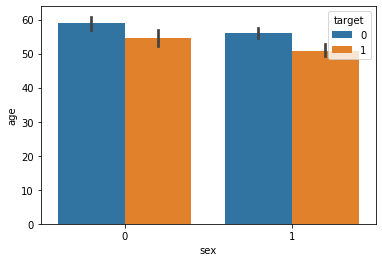

In [15]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

We see that for females who are suffering from the disease are older than males.

# one hot encoding 

In [16]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [17]:
print(" actegorical val ",categorical_val)
print("continous val ",continous_val)

 actegorical val  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous val  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


plotiing categorical features below

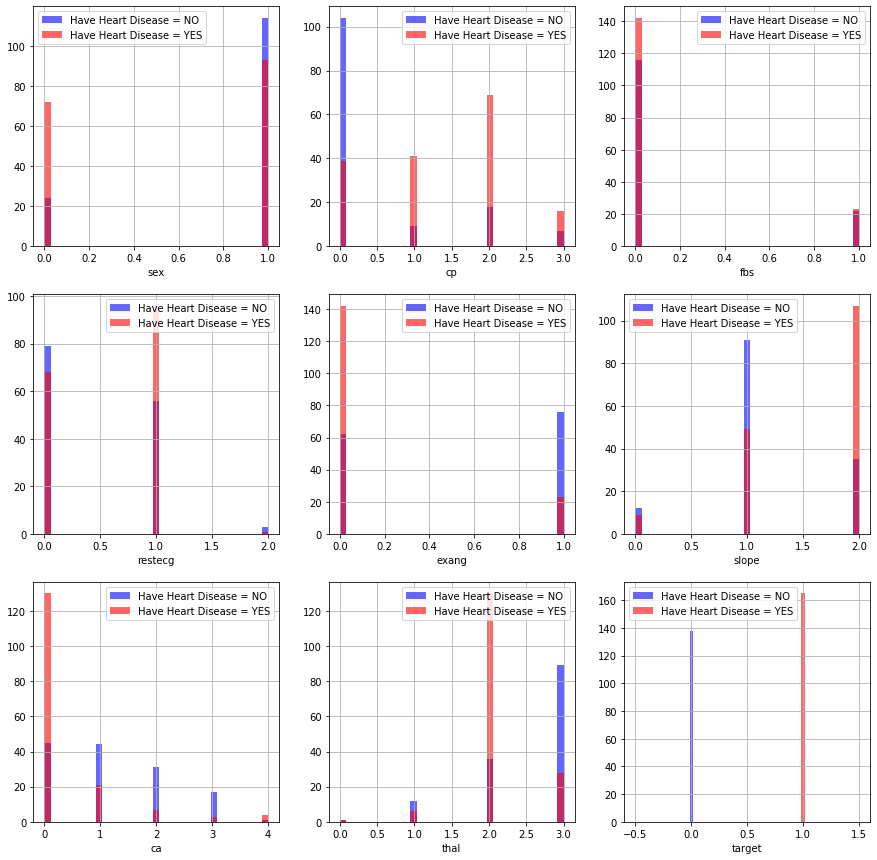

In [18]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)



In [19]:
print('''---> cp {Chest Pain} : People with cp equl to
      1, 2, 3 are more likely to have heart disease than 
      people with cp equal to 0.
      \n\n--->restecg {resting electrocardiographic results} : 
      People with value 1 (signals non-normal heart beat, can range from 
      mild symptoms to severe problems) are more likely to have heart 
      disease.\n\n---> exang {exercise induced angina} 
      : People with value 0 (No ==> exercice induced angina) 
      have heart disease more than people with value 1 
      (Yes ==> exercice induced angina)\n\n--->slope 
      {the slope of the peak exercise ST segment} : 
      People with slope value equal to 2 
      (Downslopins: signs of unhealthy heart) 
      are more likely to have heart disease than people with slope value 
      equal to 0 (Upsloping: better heart rate with excercise) or 1 
      (Flatsloping: minimal change (typical healthy heart))
      .\n\n-->ca {number of major vessels (0-3) colored by flourosopy} 
      : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.\n\n --->thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.''')

---> cp {Chest Pain} : People with cp equl to
      1, 2, 3 are more likely to have heart disease than 
      people with cp equal to 0.
      

--->restecg {resting electrocardiographic results} : 
      People with value 1 (signals non-normal heart beat, can range from 
      mild symptoms to severe problems) are more likely to have heart 
      disease.

---> exang {exercise induced angina} 
      : People with value 0 (No ==> exercice induced angina) 
      have heart disease more than people with value 1 
      (Yes ==> exercice induced angina)

--->slope 
      {the slope of the peak exercise ST segment} : 
      People with slope value equal to 2 
      (Downslopins: signs of unhealthy heart) 
      are more likely to have heart disease than people with slope value 
      equal to 0 (Upsloping: better heart rate with excercise) or 1 
      (Flatsloping: minimal change (typical healthy heart))
      .

-->ca {number of major vessels (0-3) colored by flourosopy} 
      : the more 

ploting continous features below

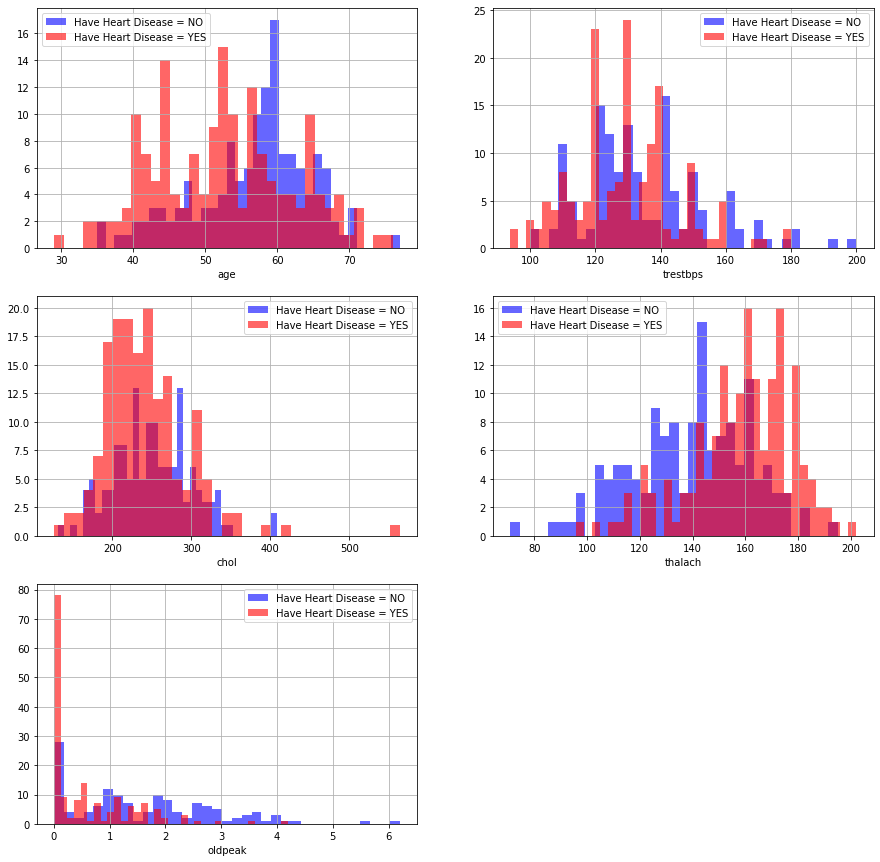

In [20]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


In [21]:
print('''\n\n---> trestbps : resting blood pressure 
(in mm Hg on admission to the hospital) anything above 130-140 is
typically cause for concern\n\n---> chol {serum cholestoral in mg/dl} : 
above 200 is cause for concern.\n\n---> thalach {maximum heart rate achieved} :
People how acheived a maximum more than 140 are more likely to have
heart disease.\n\n--->oldpeak ST depression induced by exercise relative
to rest looks at stress of
heart during excercise unhealthy heart will stress more''')



---> trestbps : resting blood pressure 
(in mm Hg on admission to the hospital) anything above 130-140 is
typically cause for concern

---> chol {serum cholestoral in mg/dl} : 
above 200 is cause for concern.

---> thalach {maximum heart rate achieved} :
People how acheived a maximum more than 140 are more likely to have
heart disease.

--->oldpeak ST depression induced by exercise relative
to rest looks at stress of
heart during excercise unhealthy heart will stress more


# Age vs. Max Heart Rate for Heart Disease

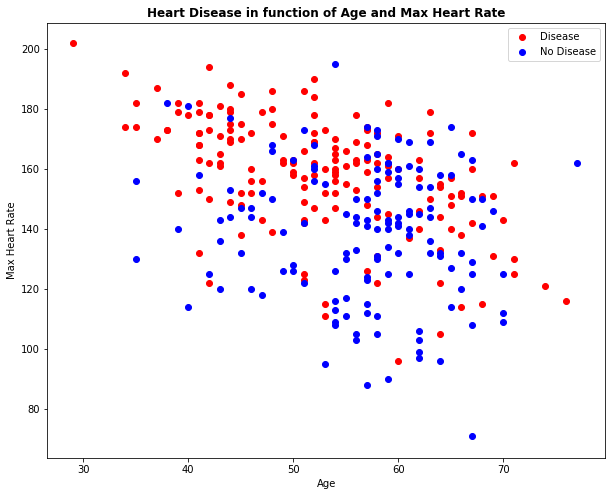

In [22]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="r")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate",fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
#terminator elimnates <matplotlib.legend.Legend at 0x7f39518951d0>


# # Correlation Matrix (heat map)

(13.8, 0.2)

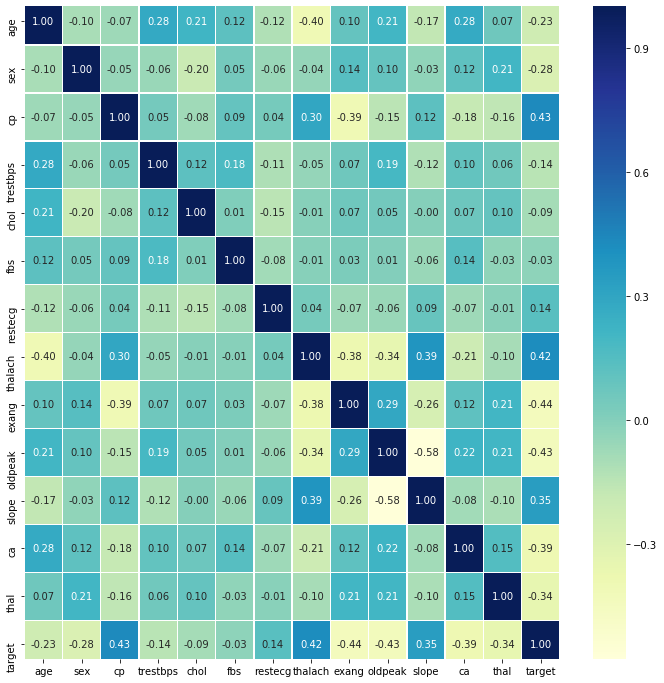

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.3, top - 0.3)


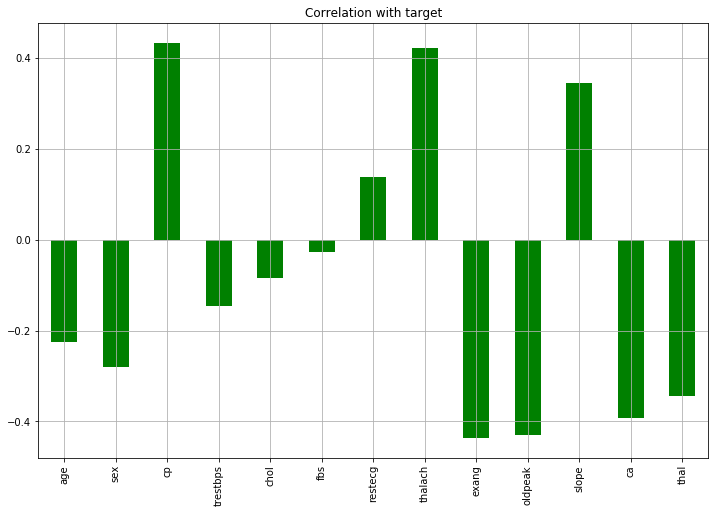

In [24]:

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target",color="g");


In [25]:

print('''\n\n--> fbs and chol are the lowest correlated with the target variable.\n\n
---> All other variables have a significant correlation with the target variable.''')




--> fbs and chol are the lowest correlated with the target variable.


---> All other variables have a significant correlation with the target variable.


# Data processing

In [26]:

if 'target'  in categorical_val:
    categorical_val.remove('target')
    dataset = pd.get_dummies(df, columns = categorical_val)
else:
    pass

dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [27]:
print(df.columns)

print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [28]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])


# accuracy calc definition

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
train_score_1x={}

f1_train1x={}
precision_train1x={}
recall_train1x={}
test_score_1x={}
f1_test1x={}
precision_test1x={}
recall_test1x={}
def print_score(algo_name,clf, X_train, y_train, X_test, y_test, train=True):
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        train_score_1x["Training score "+algo_name]=accuracy_score(y_train, pred) * 100
        f1_train1x[algo_name+" training f1 score "]=f1_score(y_train, pred) * 100
        precision_train1x[algo_name+" training precision score"]=precision_score(y_train, pred) * 100
        recall_train1x[algo_name+" training recall score"]= recall_score(y_train, pred) * 100
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        test_score_1x["Testing score"+algo_name]=accuracy_score(y_test, pred) * 100
        f1_test1x[algo_name+" testing f1 score"]=f1_score(y_test, pred) * 100
        precision_test1x[algo_name+" testing precision score"]=precision_score(y_test, pred) * 100
        recall_test1x[algo_name+" testing recall score"]= recall_score(y_test, pred) * 100
    #return f1_train , precision_train ,recall_train,f1_test,precision_test,recall_test

In [30]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
179,0.29,1.05,0.57,-1.65,-0.38,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
228,0.51,2.19,0.81,0.41,-0.72,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
111,0.29,1.05,-2.32,1.02,-0.72,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
246,0.18,0.14,3.14,0.02,0.74,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
60,1.83,-1.23,0.36,-0.86,-0.90,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.37,0.48,1.00,-1.21,2.73,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
19,1.61,0.48,-0.14,0.06,0.66,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
143,1.39,-1.46,-0.45,-0.33,-0.64,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
79,0.40,-1.52,-0.12,0.19,-0.38,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try  different machine learning models:

Logistic Regression
K-Nearest Neighbours Classifier
Decision Tree Classifier
Random Forest Classifier
XGBoost Classifier

# Below Algorithms without hypertuning

Decsion tree

In [32]:
from sklearn.tree import DecisionTreeClassifier


tree2 = DecisionTreeClassifier(random_state=42)
tree2.fit(X_train, y_train)

print_score("*dt ",tree2, X_train, y_train, X_test, y_test, train=True)
print_score("*dt ",tree2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
Classification Report:	Precision Score: 84.09%
			Recall Score: 74.00%
			F1 score: 78.72%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



Random Forest below

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest2 = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest2.fit(X_train, y_train)

print_score("*random\nforest",rand_forest2, X_train, y_train, X_test, y_test, train=True)
print_score("*random\n forest",rand_forest2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier2 = KNeighborsClassifier()
knn_classifier2.fit(X_train, y_train)

print_score("*KNN",knn_classifier2, X_train, y_train, X_test, y_test, train=True)
print_score("*KNN",knn_classifier2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 87.18%
			Recall Score: 88.70%
			F1 score: 87.93%
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 88.00%
			Recall Score: 88.00%
			F1 score: 88.00%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(solver='liblinear')
log_reg2.fit(X_train, y_train);
print_score("*log-reg",log_reg2, X_train, y_train, X_test, y_test, train=True)
print_score("*log-reg",log_reg2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 86.54%
			Recall Score: 90.00%
			F1 score: 88.24%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



SVM

In [36]:
from sklearn.svm import SVC
svm2 = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm2.fit(X_train, y_train);
print_score("*SVM",svm2, X_train, y_train, X_test, y_test, train=True)
print_score("*SVM",svm2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.40%
_______________________________________________
Classification Report:	Precision Score: 93.16%
			Recall Score: 94.78%
			F1 score: 93.97%
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
Classification Report:	Precision Score: 89.80%
			Recall Score: 88.00%
			F1 score: 88.89%
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



xgboost

In [37]:
from xgboost import XGBClassifier 
xgboost2 = XGBClassifier()
#xgboost1=RandomizedSearchCV(xgboost1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);
#xgboost1.fit(X_train, y_train)

In [38]:
xgboost2=XGBClassifier()
xgboost2.fit(X_train, y_train);

In [39]:
print_score("*xgboost",xgboost2 , X_train, y_train, X_test, y_test, train=True)
print_score("*xgboost",xgboost2 , X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.58%
_______________________________________________
Classification Report:	Precision Score: 98.28%
			Recall Score: 99.13%
			F1 score: 98.70%
_______________________________________________
Confusion Matrix: 
 [[ 95   2]
 [  1 114]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



Voting classifier

In [40]:
from sklearn.ensemble import VotingClassifier 


In [41]:
voting_clf2 = VotingClassifier( estimators=[
                                          ('lr',log_reg2 ), 
                                         ('knn',knn_classifier2 ),
                                          ('dt',tree2),
                                         ('rf',rand_forest2),
                                          ('xgb',xgboost2),
                                          
                                          ],
                                            voting ='soft')
voting_clf2.fit(X_train,y_train);

In [42]:
for clf in (
            log_reg2,
            knn_classifier2,
            tree2,
            rand_forest2,
            xgboost2,
            voting_clf2):
    voting_clf2.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)*100)

LogisticRegression 86.81318681318682
KNeighborsClassifier 86.81318681318682
DecisionTreeClassifier 78.02197802197803
RandomForestClassifier 82.41758241758241
XGBClassifier 83.51648351648352
VotingClassifier 83.51648351648352


In [43]:
print_score("*voting",voting_clf2, X_train, y_train, X_test, y_test, train=True)
print_score("*voting",voting_clf2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.06%
_______________________________________________
Classification Report:	Precision Score: 98.29%
			Recall Score: 100.00%
			F1 score: 99.14%
_______________________________________________
Confusion Matrix: 
 [[ 95   2]
 [  0 115]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



# Accuracy 

So as we have dictionries in print_score()  function 
we will extract value from these dictionaries for 
ploting purpose  
those dictionaries are
train_score_1x={}
f1_train1x={}
precision_train1x={}
recall_train1x={}
test_score_1x={}
f1_test1x={}
precision_test1x={}
recall_test1x={}

In [44]:
#test_scores=[test_score1,test_score2,test_score3,test_score4,test_score5]


algos_names1=["Decision\ntree","Random\nforest", "KNN","Logistic\nregression","SVM","xgboost"]
train_score_1=list(train_score_1x.values())
test_score_1=list(test_score_1x.values())
f1_test1=list(f1_test1x.values())
precision_test1=list(precision_test1x.values())
recall_test1=list(recall_test1x.values())
f1_train1=list(f1_train1x.values())
precision_train1=list(precision_train1x.values())
recall_train1=list(recall_train1x.values())


In [45]:
test_score_1

[78.02197802197803,
 82.41758241758241,
 86.81318681318682,
 86.81318681318682,
 87.91208791208791,
 83.51648351648352,
 83.51648351648352]

Genrating csv of above algorithms

In [46]:
results_df = pd.DataFrame(data=[["Random forest",test_score_1[1],f1_test1[1],precision_test1[1],recall_test1[1]],
                                ["KNN",test_score_1[2],f1_test1[2],precision_test1[2],recall_test1[2]],
                                ["Decision tree",test_score_1[0],f1_test1[0],precision_test1[0],recall_test1[0]],
                                ["Logistic Regression", test_score_1[3],f1_test1[3],precision_test1[3],recall_test1[3]],
                                ["SVM", test_score_1[4],f1_test1[4],precision_test1[4],recall_test1[4]] ,
                                ["Xgboost", test_score_1[5],f1_test1[5],precision_test1[5],recall_test1[5]] ,
                                ["Voting", test_score_1[6],f1_test1[6],precision_test1[6],recall_test1[6]] 
                                
                               ], 
                          columns=['Model', 'Testing Accuracy %'
                                  ,'f1 test %','Precision test %','Recall test %'])



#results_df.to_csv("results/*trainresults.csv") 

results_df

,Model,Testing Accuracy %,f1 test %,Precision test %,Recall test %
0,Random forest,82.42,84.00,84.00,84.00
1,KNN,86.81,88.00,88.00,88.00
2,Decision tree,78.02,78.72,84.09,74.00
3,Logistic Regression,86.81,88.24,86.54,90.00
4,SVM,87.91,88.89,89.80,88.00
5,Xgboost,83.52,84.85,85.71,84.00
6,Voting,83.52,84.85,85.71,84.00


Voting classifier

# Below Algos with HYPERPARAMETER TUNING ON ALGOS

# Decision tree hyper parameter tuning

In [47]:
from sklearn. tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }


tree1 = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree1, params, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

print("""
Verbose is a general programming term for produce lots of logging output.
You can think of it as asking the program to "tell me everything about what you are doing all the time".
Just set it to true and see what happens.

iid : boolean, default=True

    If True, the data is assumed to be identically distributed across the folds, and the loss minimized is the total 
    loss per sample, and not the mean loss across the folds.

n_jobs : int, default=1

    Number of jobs to run in parallel.""")


Verbose is a general programming term for produce lots of logging output.
You can think of it as asking the program to "tell me everything about what you are doing all the time".
Just set it to true and see what happens.

iid : boolean, default=True

    If True, the data is assumed to be identically distributed across the folds, and the loss minimized is the total 
    loss per sample, and not the mean loss across the folds.

n_jobs : int, default=1

    Number of jobs to run in parallel.


In [48]:
#grid_search_cv.fit(X_train, y_train)

In [49]:
#grid_search_cv.best_estimator_ 

In [50]:
#grid_search_cv.best_score_
#grid_search_cv.best_params_


In [51]:

print("""
best_estimator_ : estimator -> Estimator that was chosen by the search, 
                i.e. estimator which gave highest score 
                (or smallest loss if specified) on the left 
                out data. Not available if refit=False.

best_score_ : float

    Score of best_estimator on the left out data.

best_params_ : dict

    Parameter setting that gave the best results on the hold out data.

scorer_ : function

    Scorer function used on the held out data to 
    choose the best parameters for the model.")
""")


best_estimator_ : estimator -> Estimator that was chosen by the search, 
                i.e. estimator which gave highest score 
                (or smallest loss if specified) on the left 
                out data. Not available if refit=False.

best_score_ : float

    Score of best_estimator on the left out data.

best_params_ : dict

    Parameter setting that gave the best results on the hold out data.

scorer_ : function

    Scorer function used on the held out data to 
    choose the best parameters for the model.")



In [52]:
tree1 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')

In [87]:
tree1.fit(X_train, y_train)


print_score("Decision tree",tree1,X_train, y_train, X_test, y_test, train=True)
print_score("Decision tree",tree1, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 85.38%
_______________________________________________
Classification Report:	Precision Score: 83.87%
			Recall Score: 90.43%
			F1 score: 87.03%
_______________________________________________
Confusion Matrix: 
 [[ 77  20]
 [ 11 104]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 86.00%
			Recall Score: 86.00%
			F1 score: 86.00%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 7 43]]



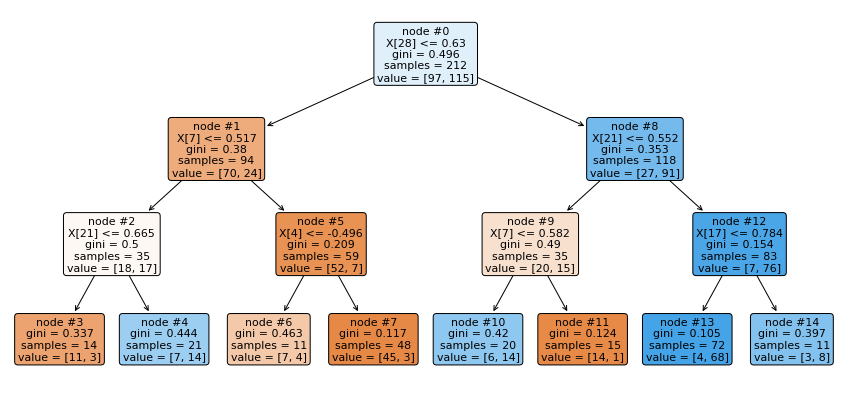

In [54]:
import matplotlib.pyplot as plt

from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(tree1,fontsize=11,node_ids=True,rounded=True,filled=True);


# logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression
"""
params1 = {"solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga"), 
           
          "C":(list(range(1, 100)))  ,
           "multi_class":("auto", "ovr")
          }
"""
log_reg = LogisticRegression(random_state=42,solver="liblinear")

#grid_search_cv = GridSearchCV(log_reg, params1, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

#grid_search_cv.fit(X_train, y_train)


log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#grid_search_cv.best_estimator_ 



In [57]:
log_reg = LogisticRegression(C=1,solver="newton-cg")
log_reg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=True)
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 84.91%
			Recall Score: 90.00%
			F1 score: 87.38%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



In [59]:
from sklearn import svm

In [60]:
params= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [61]:
svm1 = svm.SVC(kernel='linear') 
#svmrn=RandomizedSearchCV(svm1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);


In [62]:
#svmrn.fit(X_train, y_train)

In [63]:
#svmrn.best_estimator_

In [64]:
svm1=svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
svm1.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=True)
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.91%
_______________________________________________
Classification Report:	Precision Score: 84.30%
			Recall Score: 88.70%
			F1 score: 86.44%
_______________________________________________
Confusion Matrix: 
 [[ 78  19]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 88.00%
			Recall Score: 88.00%
			F1 score: 88.00%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [67]:
f1_test1

[78.72340425531915,
 83.99999999999999,
 88.0,
 88.23529411764707,
 88.8888888888889,
 84.84848484848484,
 84.84848484848484]

# KNN algorithm

In [68]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

    
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)

print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 84.43%
_______________________________________________
Classification Report:	Precision Score: 82.54%
			Recall Score: 90.43%
			F1 score: 86.31%
_______________________________________________
Confusion Matrix: 
 [[ 75  22]
 [ 11 104]]

Test Result:
Accuracy Score: 89.01%
_______________________________________________
Classification Report:	Precision Score: 87.04%
			Recall Score: 94.00%
			F1 score: 90.38%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 3 47]]



Maximum KNN score on the test data: 89.01%


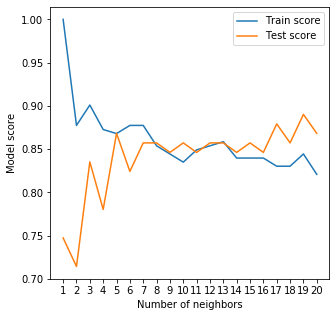

In [69]:
plt.figure(figsize=(5,5))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

# Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

"""
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier()

grid_search_cv2 = GridSearchCV(rand_forest, random_grid, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

"""
"""
    n_estimators = number of trees in the foreset
    
    max_features = max number of features considered for splitting a node
    
    max_depth = max number of levels in each decision tree
    
    min_samples_split = min number of data points placed in a node before the node is split
    
    min_samples_leaf = min number of data points allowed in a leaf node
    
    bootstrap = method for sampling data points (with or without replacement)

"""

'\n    n_estimators = number of trees in the foreset\n    \n    max_features = max number of features considered for splitting a node\n    \n    max_depth = max number of levels in each decision tree\n    \n    min_samples_split = min number of data points placed in a node before the node is split\n    \n    min_samples_leaf = min number of data points allowed in a leaf node\n    \n    bootstrap = method for sampling data points (with or without replacement)\n\n'

In [71]:
#grid_search_cv2.fit(X_train, y_train)

In [72]:
#grid_search_cv2.best_params_
#rand_forest.fit(X_train, y_train)

rand_forest = RandomForestClassifier(bootstrap= True,max_depth= 10, min_samples_split= 5, n_estimators= 200)



In [73]:
rand_forest.fit(X_train,y_train);

In [74]:
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.64%
_______________________________________________
Classification Report:	Precision Score: 97.41%
			Recall Score: 98.26%
			F1 score: 97.84%
_______________________________________________
Confusion Matrix: 
 [[ 94   3]
 [  2 113]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



# Xgboost

In [75]:
params={
    "learning_rate" :  [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [76]:
from xgboost import XGBClassifier 
xgboost1 = XGBClassifier()
#xgboost1=RandomizedSearchCV(xgboost1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);
#xgboost1.fit(X_train, y_train)

In [77]:
#xgboost1.best_estimator_



In [78]:
xgboost1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgboost1.fit(X_train, y_train);

In [79]:
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=True)
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.57%
_______________________________________________
Classification Report:	Precision Score: 90.60%
			Recall Score: 92.17%
			F1 score: 91.38%
_______________________________________________
Confusion Matrix: 
 [[ 86  11]
 [  9 106]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



# Voting classifier

In [80]:
from sklearn.ensemble import VotingClassifier 


In [81]:
voting_clf = VotingClassifier( estimators=[
                                          ('lr',log_reg2 ), 
                                         ('knn',knn_classifier ),
                                          ('dt',tree1),
                                         ('rf',rand_forest),
                                          ('xgb',xgboost1),
                                          
                                          ],
                                            voting ='soft')
voting_clf.fit(X_train,y_train);

In [82]:
for clf in (
            log_reg,
            knn_classifier,
            tree1,
            rand_forest,
            xgboost1,
            voting_clf):
    voting_clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)*100)

LogisticRegression 85.71428571428571
KNeighborsClassifier 89.01098901098901
DecisionTreeClassifier 84.61538461538461
RandomForestClassifier 84.61538461538461
XGBClassifier 83.51648351648352
VotingClassifier 83.51648351648352


In [83]:
print_score("Voting Classifier", voting_clf,X_train, y_train, X_test, y_test, train=True)
print_score("Voting Classifier",voting_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.62%
_______________________________________________
Classification Report:	Precision Score: 89.08%
			Recall Score: 92.17%
			F1 score: 90.60%
_______________________________________________
Confusion Matrix: 
 [[ 84  13]
 [  9 106]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 84.31%
			Recall Score: 86.00%
			F1 score: 85.15%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 7 43]]



# whole accuracy

below are returned scores from print_scores() fucntion

In [115]:
train_score_1x

{'Training score *dt ': 100.0,
 'Training score *random\nforest': 100.0,
 'Training score *KNN': 86.79245283018868,
 'Training score *log-reg': 86.79245283018868,
 'Training score *SVM': 93.39622641509435,
 'Training score *xgboost': 98.58490566037736,
 'Training score *voting': 99.05660377358491,
 'Training score Decision tree': 85.37735849056604,
 'Training score Logistic regression': 86.79245283018868,
 'Training score SVM': 84.90566037735849,
 'Training score KNN': 84.43396226415094,
 'Training score Random forest': 97.64150943396226,
 'Training score xgboost': 90.56603773584906,
 'Training score Voting Classifier': 89.62264150943396}

In [104]:
#test_scores=[test_score1,test_score2,test_score3,test_score4,test_score5]


algos_names=["Decision\ntree", "Logistic\nregression","SVM", "KNN", "Random\nforest","xgboost", "Voting\nClassifier"]
train_score_=list(train_score_1x.values())[7:]

test_score_=list(test_score_1x.values())[7:]
f1_test=list(f1_test1x.values())[7:]
precision_test=list(precision_test1x.values())[7:]
recall_test=list(recall_test1x.values())[7:]
f1_train=list(f1_train1x.values())[7:]
precision_train=list(precision_train1x.values())[7:]
recall_train=list(recall_train1x.values())[7:]


In [118]:
results_df1 = pd.DataFrame(data=[["Random forest",test_score_[4],f1_test[4],precision_test[4],recall_test[4]],
                                ["KNN",test_score_[3],f1_test[3],precision_test[3],recall_test[3]],
                                ["Decision tree",train_score_[0],f1_test[0],precision_test[0],recall_test[0]],
                                ["Logistic Regression", test_score_[1],f1_test[1],precision_test[1],recall_test[1]],
                                ["SVM", test_score_[2],f1_test[2],precision_test[2],recall_test[2]],
                                ["xgboost",test_score_[5],f1_test[5],precision_test[5],recall_test[5]],
                                ["Voting",test_score_[6],f1_test[6],precision_test[6],recall_test[6]]
                                
                               
                                ], 
                          columns=['Model', 'Testing Accuracy %'
                                  ,'f1 test %','Precision test %','Recall test %'])
results_df1

,Model,Testing Accuracy %,f1 test %,Precision test %,Recall test %
0,Random forest,84.62,86.27,84.62,88.00
1,KNN,89.01,90.38,87.04,94.00
2,Decision tree,85.38,86.00,86.00,86.00
3,Logistic Regression,85.71,87.38,84.91,90.00
4,SVM,86.81,88.00,88.00,88.00
5,xgboost,83.52,84.85,85.71,84.00
6,Voting,83.52,85.15,84.31,86.00


# Training Plots

In [ ]:
"""
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Training Accuracy  plot of algrothims",fontweight="bold")

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Accuracy",fontweight="bold")
plt.bar(algos_names,train_score_
                 ,color=['r','b','g','y','m']);

plt.subplot(2,2,2)


plt.title(" f1 train score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,f1_train,color=['r','b','g','y','m']);


plt.subplot(2,2,3)

plt.title(" Precision train score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,precision_train,color=['r','b','g','y','m']);



plt.subplot(2,2,4)

plt.title(" recall train score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,recall_train,color=['r','b','g','y','m']);
"""

# Test plots

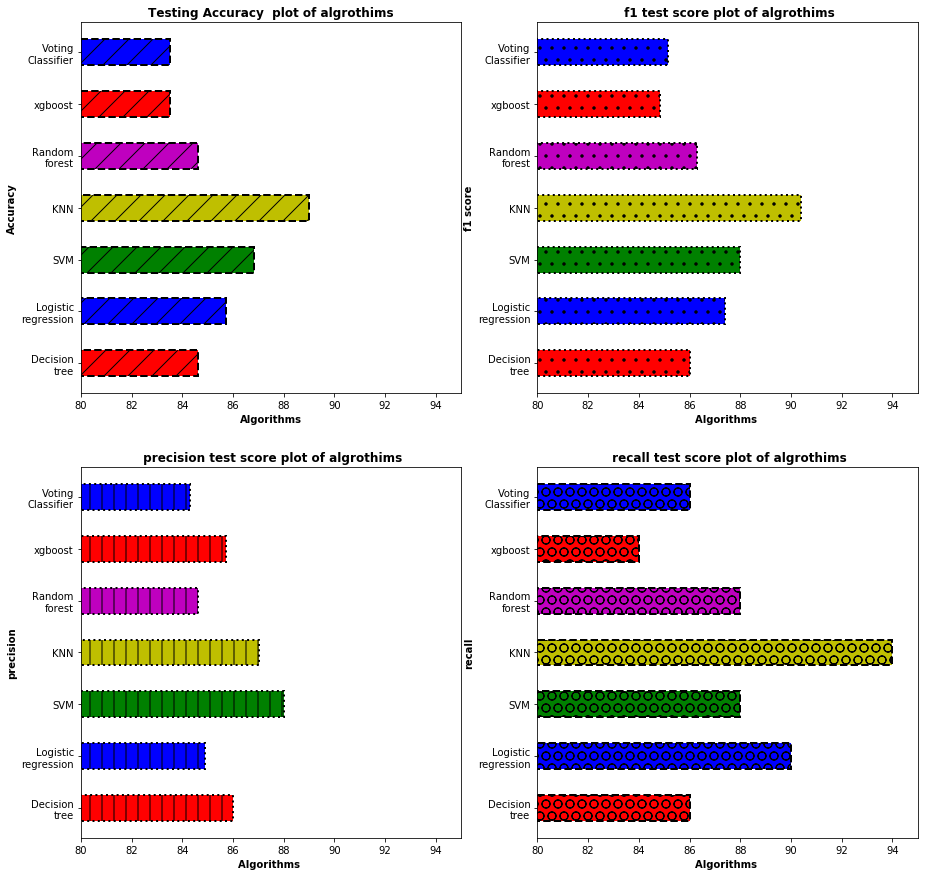

In [119]:

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Testing Accuracy  plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms",fontweight="bold")
plt.ylabel("Accuracy",fontweight="bold")
plt.xlim(80,95)
plt.barh(algos_names,test_score_,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='/',linestyle='--');



plt.subplot(2,2,2)
plt.title(" f1 test score plot of algrothims",fontweight="bold")

plt.xlim(80,95)
plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("f1 score",fontweight="bold")

plt.barh(algos_names,f1_test,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='.',linestyle=':');



plt.subplot(2,2,3)
plt.title(" precision test score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("precision",fontweight="bold")
plt.xlim(80,95)
plt.barh(algos_names,precision_test,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='|',linestyle=':');


plt.subplot(2,2,4)
plt.title(" recall test score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("recall",fontweight="bold")
plt.xlim(80,95)
plt.barh(algos_names,recall_test,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='O',linestyle='--');

In [120]:
imp=rand_forest.feature_importances_
imp

array([0.06258489, 0.04734909, 0.04872014, 0.06705707, 0.07486247,
       0.01461843, 0.0206017 , 0.07708516, 0.00840914, 0.0300763 ,
       0.00871553, 0.00678906, 0.00593753, 0.00891056, 0.00904595,
       0.00130696, 0.0513266 , 0.0640841 , 0.00281782, 0.02634131,
       0.03157067, 0.1190975 , 0.02458528, 0.01152783, 0.01159245,
       0.00015904, 0.00021388, 0.00454553, 0.08161435, 0.07845368])

In [121]:
for i,v in enumerate(imp):
    print('feature ',i,'Score',v)

feature  0 Score 0.06258488805894727
feature  1 Score 0.04734908826517707
feature  2 Score 0.04872013563149144
feature  3 Score 0.0670570744725713
feature  4 Score 0.07486246806771063
feature  5 Score 0.014618426927379144
feature  6 Score 0.020601698952352185
feature  7 Score 0.07708515905505298
feature  8 Score 0.008409139588126056
feature  9 Score 0.030076299024647164
feature  10 Score 0.008715533170272944
feature  11 Score 0.006789056002055091
feature  12 Score 0.005937533263283677
feature  13 Score 0.008910558665448315
feature  14 Score 0.00904595197475274
feature  15 Score 0.0013069560515746685
feature  16 Score 0.051326602137572966
feature  17 Score 0.0640841026235832
feature  18 Score 0.002817819255609258
feature  19 Score 0.026341307076418925
feature  20 Score 0.031570668539382535
feature  21 Score 0.11909750151886982
feature  22 Score 0.02458527949916572
feature  23 Score 0.011527830544812068
feature  24 Score 0.011592449085254478
feature  25 Score 0.00015903714712089799
featu

In [122]:
feature_dict={}
for feature , imp in zip(df.columns,imp):
    feature_dict[feature]=imp

In [123]:
feature_dict

{'age': 0.06258488805894727,
 'sex': 0.04734908826517707,
 'cp': 0.04872013563149144,
 'trestbps': 0.0670570744725713,
 'chol': 0.07486246806771063,
 'fbs': 0.014618426927379144,
 'restecg': 0.020601698952352185,
 'thalach': 0.07708515905505298,
 'exang': 0.008409139588126056,
 'oldpeak': 0.030076299024647164,
 'slope': 0.008715533170272944,
 'ca': 0.006789056002055091,
 'thal': 0.005937533263283677,
 'target': 0.008910558665448315}

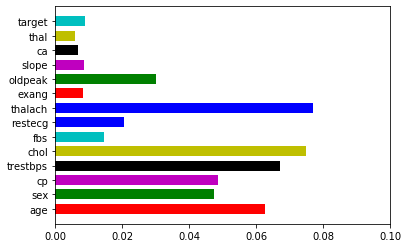

In [124]:


fig, ax = plt.subplots()

plt.xlim(0,0.1)

#plt.figure(figsize=(15,15))

ax.barh(list(feature_dict.keys()),list(feature_dict.values()),color=['r','g','m','k','y','c','b','b'],height=0.7);

plt.show()

In [183]:
results_df1

,Model,Testing Accuracy %,f1 test %,Precision test %,Recall test %
0,Random forest,84.62,86.27,84.62,88.00
1,KNN,89.01,90.38,87.04,94.00
2,Decision tree,85.38,86.00,86.00,86.00
3,Logistic Regression,85.71,87.38,84.91,90.00
4,SVM,86.81,88.00,88.00,88.00
5,xgboost,83.52,84.85,85.71,84.00
6,Voting,83.52,85.15,84.31,86.00


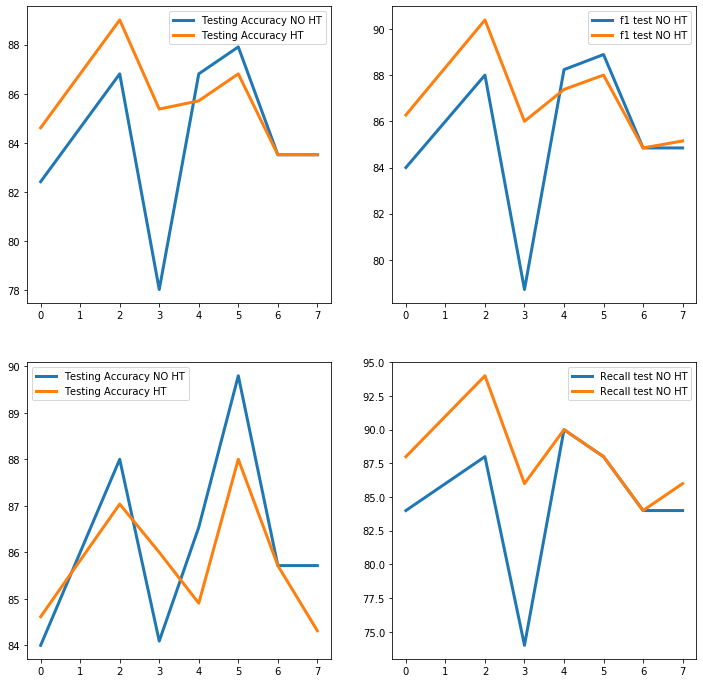

In [188]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)

plt.plot([0,2,3,4,5,6,7],results_df["Testing Accuracy %"],label="Testing Accuracy NO HT",linewidth="3")
plt.plot([0,2,3,4,5,6,7],results_df1["Testing Accuracy %"],label="Testing Accuracy HT",linewidth="3")
plt.legend()
plt.subplot(2,2,2)

plt.plot([0,2,3,4,5,6,7],results_df["f1 test %"],label="f1 test NO HT",linewidth="3")
plt.plot([0,2,3,4,5,6,7],results_df1["f1 test %"],label="f1 test NO HT",linewidth="3")

plt.legend()
plt.subplot(2,2,3)

plt.plot([0,2,3,4,5,6,7],results_df["Precision test %"],label="Testing Accuracy NO HT",linewidth="3")
plt.plot([0,2,3,4,5,6,7],results_df1["Precision test %"],label="Testing Accuracy HT",linewidth="3")

plt.legend();
plt.subplot(2,2,4)

plt.plot([0,2,3,4,5,6,7],results_df["Recall test %"],label="Recall test NO HT",linewidth="3")
plt.plot([0,2,3,4,5,6,7],results_df1["Recall test %"],label="Recall test NO HT",linewidth="3")

plt.legend();
